https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_data = pd.read_csv('../data/kc_house_data.csv')

house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_data.drop(['id', 'lat', 'long', 'zipcode'], inplace=True, axis=1)

house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 

In [5]:
house_data['date'] = pd.to_datetime(house_data['date'])
house_data['house_age'] = house_data['date'].dt.year - house_data['yr_built']

house_data.drop('date', inplace=True, axis=1)
house_data = house_data.drop('yr_built', axis=1)

In [6]:
house_data['renovated'] = house_data['yr_renovated'].apply(lambda x:0 if x == 0 else 1)

house_data.drop('yr_renovated', inplace=True, axis=1)

In [7]:
house_data[['renovated', 'house_age']].sample(10)

,renovated,house_age
2456,0,74
1473,0,86
7556,0,11
17779,0,6
18614,0,10
19356,0,15
20230,0,5
7998,0,54
609,0,19
57,0,12


In [8]:
os.makedirs('../data/processed', exist_ok=True)
house_data.to_csv('../data/processed/house_data_processed.csv', index=False)

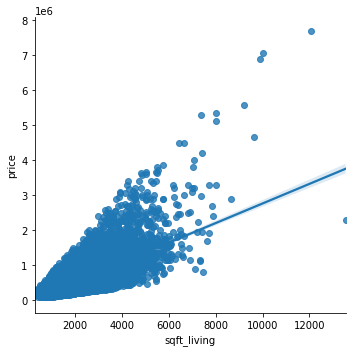

In [9]:
sns.lmplot('sqft_living', 'price', house_data);

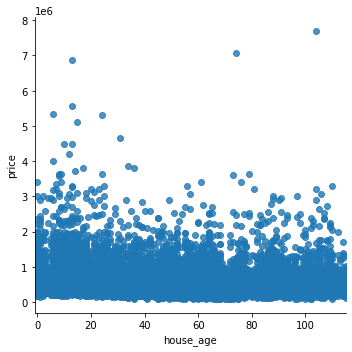

In [10]:
sns.lmplot('house_age', 'price', house_data);

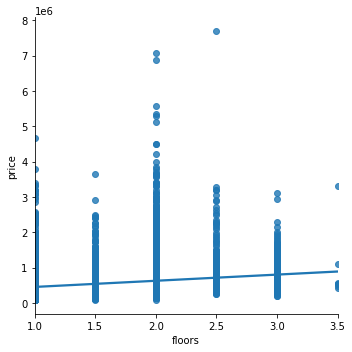

In [11]:
sns.lmplot('floors', 'price', house_data);

### Scaling dataset and one feature for simple linear regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [13]:
X = house_data[['sqft_living']]

y = house_data['price']

In [14]:
X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [15]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)

In [17]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
linear_regression = LinearRegression()

model = linear_regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
df = pd.DataFrame({'test': y_test, 'predicted': y_pred})

df.sample(10)

,test,predicted
11891,625000.0,7.500103e+05
4413,1150000.0,1.010260e+06
16895,315000.0,5.406791e+05
20920,1830000.0,1.225249e+06
16420,352750.0,2.521414e+05
20464,432500.0,8.495841e+05
958,345500.0,3.341766e+05
17546,337000.0,8.575048e+05
946,260000.0,4.643015e+05
20816,1105000.0,8.857928e+05


### Regression line

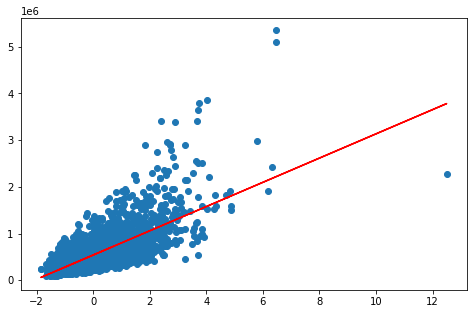

In [21]:
plt.figure(figsize=(8, 5))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

plt.show();

In [22]:
print("Training score : ", linear_regression.score(X_train, y_train))

Training score :  0.49519896192645835


In [23]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

print("Testing score : ", score)

Testing score :  0.4828907361346523


In [24]:
theta_0 = linear_regression.coef_
theta_0

array([259330.3910058])

In [25]:
intercept = linear_regression.intercept_
intercept

540738.4348756507

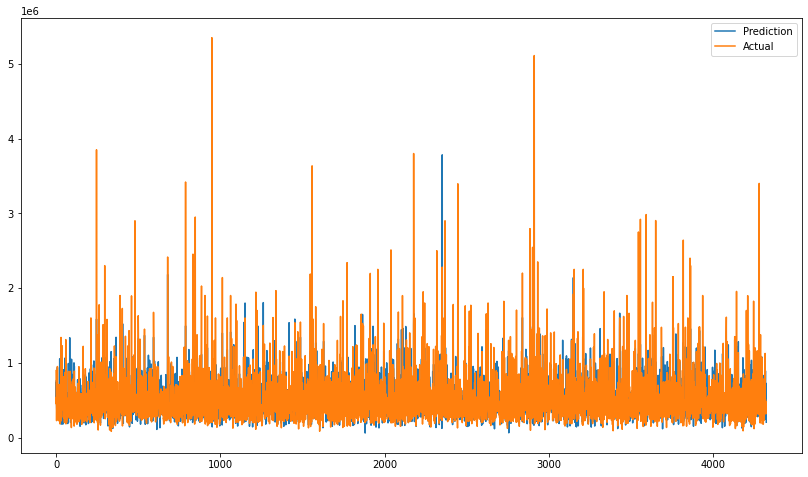

In [26]:
plt.subplots(figsize=(14,8))

plt.plot(y_pred, label="Prediction")
plt.plot(y_test.values, label="Actual")

plt.legend()

plt.show()

In [27]:
import statsmodels.api as sm

### Adding a constant

In [28]:
X_train[:5]

array([[ 2.54135738e+00],
       [-6.21990255e-01],
       [-1.30920026e+00],
       [-9.38325018e-01],
       [-2.28823954e-04]])

In [29]:
X_train = sm.add_constant(X_train)

X_train[:5]

array([[ 1.00000000e+00,  2.54135738e+00],
       [ 1.00000000e+00, -6.21990255e-01],
       [ 1.00000000e+00, -1.30920026e+00],
       [ 1.00000000e+00, -9.38325018e-01],
       [ 1.00000000e+00, -2.28823954e-04]])

In [30]:
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.696e+04
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        10:53:59   Log-Likelihood:            -2.4023e+05
No. Observations:               17290   AIC:                         4.805e+05
Df Residuals:                   17288   BIC:                         4.805e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.407e+05   1991.367    271.541      0.0

In [31]:
theta_0, intercept

(array([259330.3910058]), 540738.4348756507)